In [66]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [67]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [68]:
num_epochs = 10
batch_size = 64
learning_rate = 0.001

In [69]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())

In [70]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

In [71]:
class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()
    self.fc1 = nn.Linear(28*28, 256)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(256, 10)

  def forward(self,x):
    x = x.view(-1, 28*28)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    return x
model = NeuralNet().to(device)

In [72]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)
      loss = criterion(outputs, labels)

      optimizer.zero_grad()

      loss.backward()
      optimizer.step()

    if (i+1) % 100 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


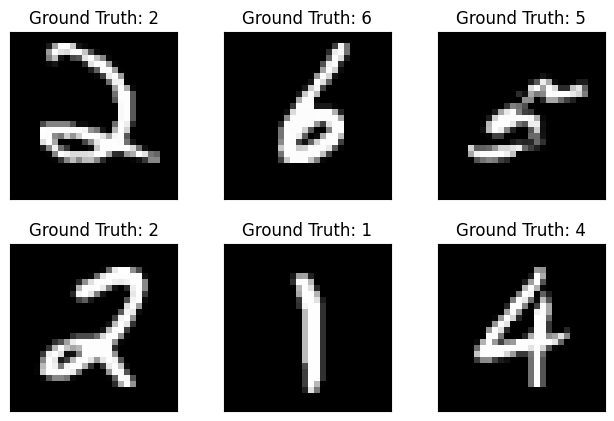

In [73]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()
